## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
train, test = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [26]:
## 資料前處理

def preproc_x(data):
    return tf.keras.utils.normalize(data, axis=-1, order=2).reshape((len(data), -1))

def preproc_y(data):
    return tf.keras.utils.to_categorical(data)

In [27]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [29]:
x_train.shape

(50000, 3072)

In [30]:
def build_mlp():
    input_layer = tf.keras.layers.Input([x_train.shape[-1]])
    x = tf.keras.layers.Dense(units=1024, activation="relu")(input_layer)
    x = tf.keras.layers.Dense(units=512, activation="relu")(x)
    x = tf.keras.layers.Dense(units=256, activation="relu")(x)
    x = tf.keras.layers.Dense(units=128, activation="relu")(x)
    x = tf.keras.layers.Dense(units=64, activation="relu")(x)
    x = tf.keras.layers.Dense(units=32, activation="relu")(x)
    out = tf.keras.layers.Dense(units=10, activation="softmax")(x)

    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_21 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080

In [20]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [31]:
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [32]:
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 10s 11ms/step - loss: 2.1862 - accuracy: 0.1672 - val_loss: 2.0932 - val_accuracy: 0.2060
Epoch 2/100
196/196 [==============================] - 2s 8ms/step - loss: 2.0689 - accuracy: 0.2123 - val_loss: 2.0294 - val_accuracy: 0.2366
Epoch 3/100
196/196 [==============================] - 1s 7ms/step - loss: 1.9950 - accuracy: 0.2566 - val_loss: 1.9040 - val_accuracy: 0.2971
Epoch 4/100
196/196 [==============================] - 2s 8ms/step - loss: 1.9030 - accuracy: 0.2999 - val_loss: 1.9050 - val_accuracy: 0.2957
Epoch 5/100
196/196 [==============================] - 2s 9ms/step - loss: 1.8800 - accuracy: 0.3074 - val_loss: 1.8591 - val_accuracy: 0.3125
Epoch 6/100
196/196 [==============================] - 2s 8ms/step - loss: 1.8465 - accuracy: 0.3228 - val_loss: 1.8362 - val_accuracy: 0.3155
Epoch 7/100
196/196 [==============================] - 2s 8ms/step - loss: 1.8227 - accuracy: 0.3315 - val_loss: 1.8220 - val_accuracy: 0.33

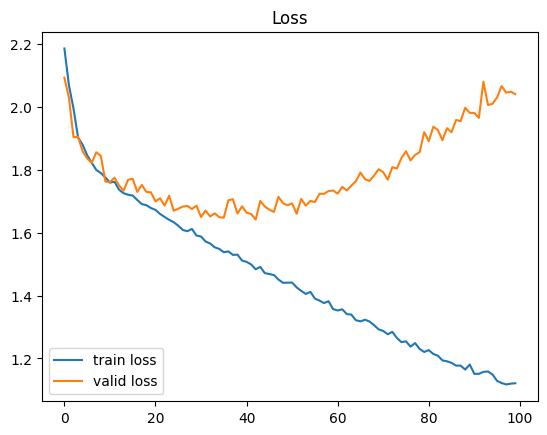

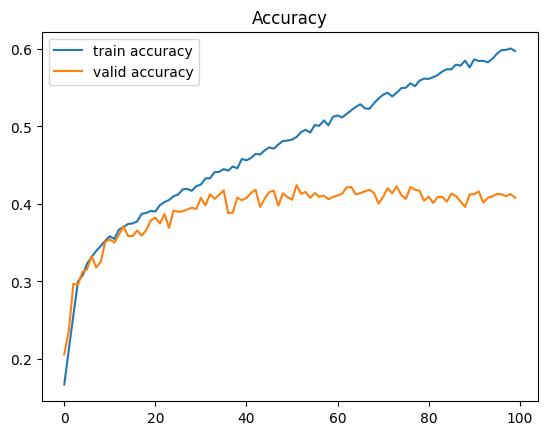

In [34]:

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()